In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
customers= pd.read_csv("../Data/customers.csv")
products = pd.read_csv("../Data/products.csv")
sales = pd.read_csv("../Data/sales.csv")
orders = pd.read_csv("../Data/orders.csv")

In [3]:
# What is the total revenue generated by the sales data set?

total_revenue = sales['total_price'].sum()
print("Total revenue generated: $", total_revenue)


Total revenue generated: $ 1031800


In [4]:
# What is the average price per unit of all products sold?

avg_price_per_unit = sales['price_per_unit'].mean()
print("Average price per unit: $", avg_price_per_unit)

Average price per unit: $ 103.5016


In [5]:
# What is the total quantity of products sold?

total_quantity = sales['quantity'].sum()
print("Total quantity of products sold:", total_quantity)

Total quantity of products sold: 9962


In [6]:
# What is the most commonly sold product?

most_common_product = sales['product_id'].mode()[0]
print("Most commonly sold product:", most_common_product)

Most commonly sold product: 78


In [7]:
# What is the total revenue generated per order?

revenue_per_order = sales.groupby('order_id')['total_price'].sum()
print("Total revenue generated per order:\n", revenue_per_order)

Total revenue generated per order:
 order_id
1      1487
2      1130
3       508
4       976
5      2043
       ... 
995    1127
996    1459
997     204
998    1352
999     440
Name: total_price, Length: 993, dtype: int64


In [8]:
# What is the average quantity of products sold per order?

avg_quantity_per_order = sales.groupby('order_id')['quantity'].mean()
print("Average quantity of products sold per order:\n", avg_quantity_per_order)

Average quantity of products sold per order:
 order_id
1      2.333333
2      1.833333
3      1.666667
4      2.000000
5      2.500000
         ...   
995    1.833333
996    1.875000
997    1.000000
998    2.166667
999    1.333333
Name: quantity, Length: 993, dtype: float64


In [9]:
#What is the total revenue generated by each product?

revenue_by_product = sales.groupby('product_id')['total_price'].sum()
print("Total revenue generated by each product:\n", revenue_by_product)

Total revenue generated by each product:
 product_id
1       1152
2       1056
3        576
4       1536
5        288
        ... 
1255    1120
1256     672
1257     672
1258     784
1259    1120
Name: total_price, Length: 1233, dtype: int64


In [10]:

# Calculate total revenue per order
revenue_per_order = sales.groupby('order_id')['total_price'].sum()
revenue_per_order_df = pd.DataFrame(revenue_per_order)

# Calculate total quantity per order
quantity_per_order = sales.groupby('order_id')['quantity'].sum()
quantity_per_order_df = pd.DataFrame(quantity_per_order)

# Concatenate data frames
combined_df = pd.concat([revenue_per_order_df, quantity_per_order_df], axis=1)
combined_df.columns = ['Total Revenue', 'Total Quantity']

# Save as CSV
#combined_df.to_csv('sales_summary.csv', index=True)

In [11]:
# Which products have the highest and lowest sales?

highest_sales_products = sales.groupby('product_id')['quantity'].sum().nlargest(10)
print("Products with highest sales:\n", highest_sales_products)

lowest_sales_products = sales.groupby('product_id')['quantity'].sum().nsmallest(10)
print("Products with lowest sales:\n", lowest_sales_products)

Products with highest sales:
 product_id
78      24
579     24
182     23
472     23
707     21
740     21
843     21
1038    21
486     20
1184    20
Name: quantity, dtype: int64
Products with lowest sales:
 product_id
61     1
166    1
273    1
280    1
320    1
337    1
341    1
346    1
404    1
423    1
Name: quantity, dtype: int64


# Yes

The month with the highest sales was 2021-03 with a total of $131,364.00
The month with the lowest sales was 2021-10 with a total of $84,266.00


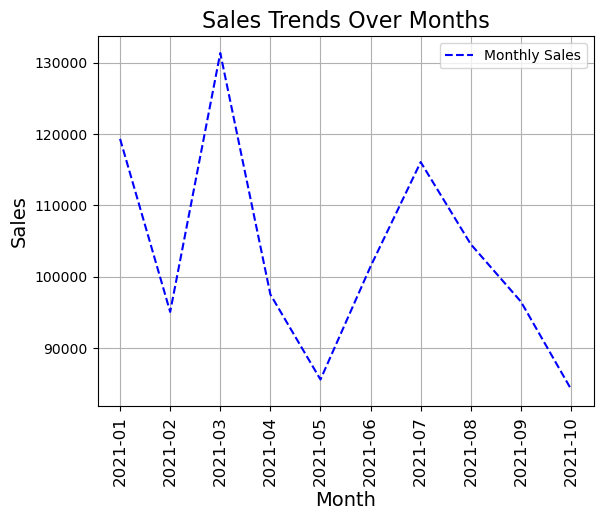

In [12]:
# Merge the sales and orders data to get the date information 
sales_orders = pd.merge(sales, orders, on='order_id')

# Convert the order_date column to a pandas datetime object
sales_orders['order_date'] = pd.to_datetime(sales_orders['order_date'])

# Add a new column to the sales_orders dataframe for the month of the order
sales_orders['month'] = sales_orders['order_date'].dt.strftime('%Y-%m')

# Group the sales data by month and sum the total_price column
monthly_sales = sales_orders.groupby('month')['total_price'].sum()

# Find the month with the highest and lowest sales
highest_sales_month = monthly_sales.idxmax()
lowest_sales_month = monthly_sales.idxmin()

# Convert the index to a string variable for better readability on the graph
monthly_sales.index = monthly_sales.index.astype(str)

# Create a line graph of the monthly sales data
plt.plot(monthly_sales.index, monthly_sales.values, label='Monthly Sales', color='blue', linestyle='--')
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Sales', fontsize=14)
plt.title('Sales Trends Over Months', fontsize=16)
plt.grid(True)
plt.legend()

# Print information about the highest and lowest sales months
print(f"The month with the highest sales was {highest_sales_month} with a total of ${monthly_sales[highest_sales_month]:,.2f}")
print(f"The month with the lowest sales was {lowest_sales_month} with a total of ${monthly_sales[lowest_sales_month]:,.2f}")

plt.show()

In [13]:
#from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonality Trend
# Merge the sales and orders data to get the date information
#sales_orders = pd.merge(sales, orders, on='order_id')

# Convert the order_date column to a pandas datetime object
#3sales_orders['order_date'] = pd.to_datetime(sales_orders['order_date'])

# Group the sales data by month and sum the total_price column
#monthly_sales = sales_orders.groupby(pd.Grouper(key='order_date', freq='M'))['total_price'].sum()

# Plot the monthly sales data
#fig, ax = plt.subplots(figsize=(10, 6))
#ax.plot(monthly_sales.index, monthly_sales.values, label='Monthly Sales', color='blue', linestyle='--')
#ax.set_xlabel('Month', fontsize=14)
#ax.set_ylabel('Sales', fontsize=14)
#ax.set_title('Sales Trends Over Months', fontsize=16)
#ax.grid(True)
#ax.legend()

# Decompose the sales data to analyze seasonality
#decomposition = seasonal_decompose(monthly_sales, model='additive')

# Plot the seasonal component
#fig, ax = plt.subplots(figsize=(10, 6))
#ax.plot(decomposition.seasonal.index, decomposition.seasonal.values, label='Seasonal Component', color='red')
#ax.set_xlabel('Month', fontsize=14)
#ax.set_ylabel('Sales', fontsize=14)
#ax.set_title('Seasonality in Sales Data', fontsize=16)
#ax.grid(True)
#ax.legend()

#plt.show()

# Yes

Text(0, 0.5, 'Total Sales ($)')

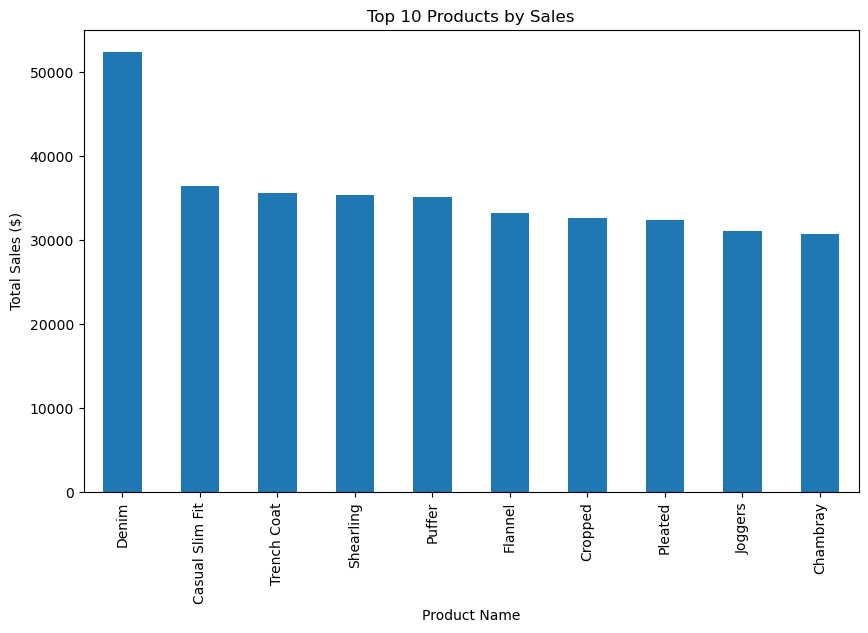

In [14]:
# Product Trends
# Merge the data into a single dataframe
sales_data = pd.merge(sales, orders, on='order_id')
sales_data = pd.merge(sales_data, products, on='product_id')
sales_data = pd.merge(sales_data, customers, on='customer_id')

# Group the sales data by product
product_sales = sales_data.groupby('product_name').sum()['total_price']

# Sort the products by their total sales
sorted_products = product_sales.sort_values(ascending=False)

# Plot the top 10 products by sales
fig, ax = plt.subplots(figsize=(10, 6))
sorted_products[:10].plot(kind='bar')
ax.set_title('Top 10 Products by Sales')
ax.set_xlabel('Product Name')
ax.set_ylabel('Total Sales ($)')

In [15]:
print(sales_data['order_date'].dtype)

object


In [16]:
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])

In [17]:
import seaborn as sns

customer_sales = sales_data.groupby(['customer_id', 'order_date']).sum()['total_price']
customer_sales = customer_sales.reset_index()
customer_sales['year_month'] = customer_sales['order_date'].dt.strftime('%Y-%m')
customer_sales = customer_sales.groupby(['customer_id', 'year_month']).sum()['total_price']
customer_sales = customer_sales.reset_index()

customer_sales.describe()

,customer_id,total_price
count,949.000000,949.000000
mean,506.329821,1087.249737
std,278.007899,553.835792
min,1.000000,95.000000
25%,276.000000,691.000000
50%,515.000000,1030.000000
75%,738.000000,1397.000000
max,1000.000000,4525.000000


Text(0.5, 1.0, 'Customer Orders vs. Sales')

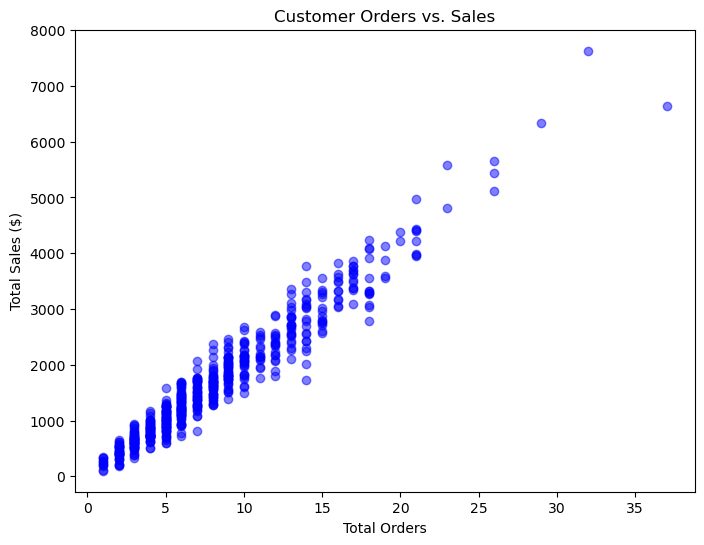

In [18]:
# Calculate the total number of orders and total sales per customer
customer_orders = sales_data.groupby('customer_id').count()['order_id']
customer_sales = sales_data.groupby('customer_id').sum()['total_price']

# Create a scatter plot of the data
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(customer_orders, customer_sales, alpha=0.5, color='blue')
ax.set_xlabel('Total Orders')
ax.set_ylabel('Total Sales ($)')
ax.set_title('Customer Orders vs. Sales')

In [19]:
 sales_demographic = pd.read_csv("../Queries/total_quantity_sold_gender_age_city_state_country.csv")

In [20]:
sales_demographic.describe()

,age,total_quantity_sold
count,4861.000000,4861.000000
mean,48.768155,2.049373
std,17.559374,0.891910
min,20.000000,1.000000
25%,34.000000,1.000000
50%,48.000000,2.000000
75%,63.000000,3.000000
max,80.000000,8.000000


In [21]:
sales_demographic.head()

,product_type,product_name,size,gender,age,city,state,country,total_quantity_sold
0,Shirt,Linen,S,Non-binary,74,West Lukeshire,New South Wales,Australia,8
1,Jacket,Peacoat,S,Genderfluid,68,Beahanfurt,Northern Territory,Australia,7
2,Jacket,Shearling,XS,Non-binary,63,Lake Madelineton,Western Australia,Australia,6
3,Jacket,Shearling,XL,Genderqueer,69,Beahanport,Northern Territory,Australia,6
4,Trousers,Cords,L,Polygender,58,Joelmouth,Australian Capital Territory,Australia,6


In [22]:
# Group the data by product type and gender to get the total quantity sold by gender for each product type
product_gender_sales = sales_demographic.groupby(['product_type', 'gender']).sum()['total_quantity_sold'].reset_index()

# Get the product with the highest total quantity sold per gender
best_selling_products = product_gender_sales.groupby('gender').apply(lambda x: x.loc[x['total_quantity_sold'].idxmax()]).reset_index(drop=True)

# Get the gender with the highest total quantity sold overall
top_buying_gender = product_gender_sales.groupby('gender').sum().idxmax()['total_quantity_sold']

print("Best selling products per gender:\n", best_selling_products)
print("Gender with the highest total quantity sold overall:", top_buying_gender)

best_selling_products.head()

Best selling products per gender:
   product_type       gender  total_quantity_sold
0       Jacket      Agender                  375
1       Jacket     Bigender                  367
2       Jacket       Female                  481
3     Trousers  Genderfluid                  474
4     Trousers  Genderqueer                  454
5       Jacket         Male                  480
6        Shirt   Non-binary                  456
7     Trousers   Polygender                  473
Gender with the highest total quantity sold overall: Female


,product_type,gender,total_quantity_sold
0,Jacket,Agender,375
1,Jacket,Bigender,367
2,Jacket,Female,481
3,Trousers,Genderfluid,474
4,Trousers,Genderqueer,454


In [23]:
from tabulate import tabulate

# Convert the pandas DataFrame to a list of lists
table = best_selling_products.values.tolist()

# Get the header of the table
header = best_selling_products.columns.tolist()

# Print the table using tabulate
print(tabulate(table, headers=header))

product_type    gender         total_quantity_sold
--------------  -----------  ---------------------
Jacket          Agender                        375
Jacket          Bigender                       367
Jacket          Female                         481
Trousers        Genderfluid                    474
Trousers        Genderqueer                    454
Jacket          Male                           480
Shirt           Non-binary                     456
Trousers        Polygender                     473


In [24]:
# Group the data by 'gender' and calculate the mean, median, mode, and standard deviation of 'total_quantity_sold'
gender_stats = sales_demographic.groupby('gender')['total_quantity_sold'].agg(['mean', 'median', lambda x: x.mode().iloc[0], 'std'])

# Rename the columns
gender_stats.columns = ['mean_quantity_sold', 'median_quantity_sold', 'mode_quantity_sold', 'std_quantity_sold']

# Print the statistics
print(gender_stats)


             mean_quantity_sold  median_quantity_sold  mode_quantity_sold  \
gender                                                                      
Agender                2.009728                   2.0                   2   
Bigender               2.015595                   2.0                   2   
Female                 2.024460                   2.0                   1   
Genderfluid            2.070997                   2.0                   1   
Genderqueer            2.033333                   2.0                   2   
Male                   2.053517                   2.0                   2   
Non-binary             2.114783                   2.0                   3   
Polygender             2.066343                   2.0                   2   

             std_quantity_sold  
gender                          
Agender               0.848059  
Bigender              0.840707  
Female                0.877664  
Genderfluid           0.938070  
Genderqueer           0.904238 

In [25]:
gender_stats.describe()

,mean_quantity_sold,median_quantity_sold,mode_quantity_sold,std_quantity_sold
count,8.000000,8.0,8.00000,8.000000
mean,2.048594,2.0,1.87500,0.889753
std,0.035126,0.0,0.64087,0.043186
min,2.009728,2.0,1.00000,0.840707
25%,2.022244,2.0,1.75000,0.854451
50%,2.043425,2.0,2.00000,0.884539
75%,2.067507,2.0,2.00000,0.912696
max,2.114783,2.0,3.00000,0.961293


# Yes

Text(0, 0.5, 'Quantity Sold')

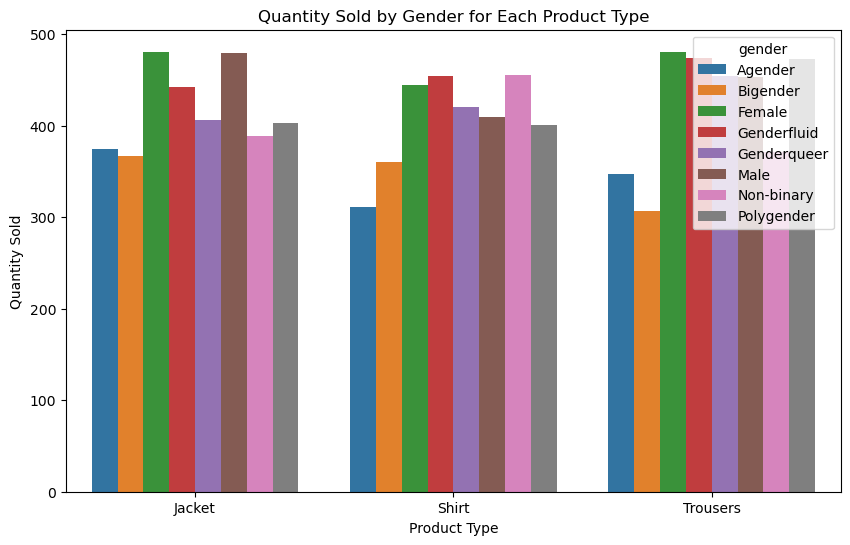

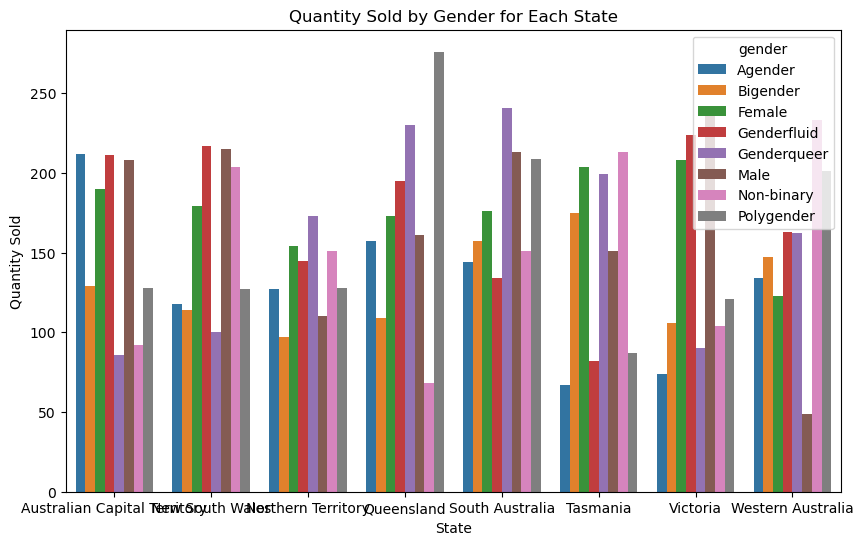

In [26]:
# Group the data by product type and gender to get the total quantity sold by gender for each product type
product_gender_sales = sales_demographic.groupby(['product_type', 'gender']).sum()['total_quantity_sold'].reset_index()

# Plot the quantity sold by gender for each product type
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='product_type', y='total_quantity_sold', hue='gender', data=product_gender_sales, ax=ax)
ax.set_title('Quantity Sold by Gender for Each Product Type')
ax.set_xlabel('Product Type')
ax.set_ylabel('Quantity Sold')

# Group the data by state and gender to get the total quantity sold by gender for each state
state_gender_sales = sales_demographic.groupby(['state', 'gender']).sum()['total_quantity_sold'].reset_index()

# Plot the quantity sold by gender for each state
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='state', y='total_quantity_sold', hue='gender', data=state_gender_sales, ax=ax)
ax.set_title('Quantity Sold by Gender for Each State')
ax.set_xlabel('State')
ax.set_ylabel('Quantity Sold')

In [27]:
product_gender_sales.head()

,product_type,gender,total_quantity_sold
0,Jacket,Agender,375
1,Jacket,Bigender,367
2,Jacket,Female,481
3,Jacket,Genderfluid,442
4,Jacket,Genderqueer,406


In [28]:
# How much of each product type is sold to each gender?
product_sales_by_gender = sales_demographic.groupby(['product_type', 'gender'])['total_quantity_sold'].sum().unstack()
#product_sales_by_gender.head()
product_sales_by_gender.describe()

gender,Agender,Bigender,Female,Genderfluid,Genderqueer,Male,Non-binary,Polygender
count,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,344.333333,344.666667,469.00000,457.000000,427.000000,447.666667,405.333333,425.666667
std,32.083225,32.807519,20.78461,16.093477,24.556058,35.303446,44.792112,41.004065
min,311.000000,307.000000,445.00000,442.000000,406.000000,410.000000,371.000000,401.000000
25%,329.000000,333.500000,463.00000,448.500000,413.500000,431.500000,380.000000,402.000000
50%,347.000000,360.000000,481.00000,455.000000,421.000000,453.000000,389.000000,403.000000
75%,361.000000,363.500000,481.00000,464.500000,437.500000,466.500000,422.500000,438.000000
max,375.000000,367.000000,481.00000,474.000000,454.000000,480.000000,456.000000,473.000000


In [29]:
# How much of each product type is sold overall, and how much of that is sold to each gender?

total_product_sales = sales_demographic.groupby('product_type')['total_quantity_sold'].sum()
product_sales_by_gender_percent = (product_sales_by_gender.div(total_product_sales, axis=0) * 100).round(2)

total_product_sales.head()
product_sales_by_gender_percent.head()

gender,Agender,Bigender,Female,Genderfluid,Genderqueer,Male,Non-binary,Polygender
product_type,,,,,,,,
Jacket,11.22,10.98,14.39,13.22,12.14,14.36,11.64,12.06
Shirt,9.54,11.05,13.65,13.96,12.92,12.58,13.99,12.30
Trousers,10.33,9.14,14.32,14.11,13.51,13.48,11.04,14.08


In [30]:
# Which gender buys the most for each product type?
preferred_gender = product_sales_by_gender.idxmax(axis=1)
product_sales_by_gender_percent['preferred_gender'] = preferred_gender
print("\nPercentage of each product type sold to each gender:")
print(product_sales_by_gender_percent)


Percentage of each product type sold to each gender:
gender        Agender  Bigender  Female  Genderfluid  Genderqueer   Male  \
product_type                                                               
Jacket          11.22     10.98   14.39        13.22        12.14  14.36   
Shirt            9.54     11.05   13.65        13.96        12.92  12.58   
Trousers        10.33      9.14   14.32        14.11        13.51  13.48   

gender        Non-binary  Polygender preferred_gender  
product_type                                           
Jacket             11.64       12.06           Female  
Shirt              13.99       12.30       Non-binary  
Trousers           11.04       14.08           Female  


In [31]:
# Which product types sell more to a specific gender?
preferred_product_type = product_sales_by_gender.idxmax()
product_sales_by_gender_percent.loc['preferred_product_type'] = preferred_product_type
print("\nProduct types that sell more to a specific gender:")
print(product_sales_by_gender_percent)


Product types that sell more to a specific gender:
gender                 Agender Bigender  Female Genderfluid Genderqueer  \
product_type                                                              
Jacket                   11.22    10.98   14.39       13.22       12.14   
Shirt                     9.54    11.05   13.65       13.96       12.92   
Trousers                 10.33     9.14   14.32       14.11       13.51   
preferred_product_type  Jacket   Jacket  Jacket    Trousers    Trousers   

gender                    Male Non-binary Polygender preferred_gender  
product_type                                                           
Jacket                   14.36      11.64      12.06           Female  
Shirt                    12.58      13.99       12.3       Non-binary  
Trousers                 13.48      11.04      14.08           Female  
preferred_product_type  Jacket      Shirt   Trousers              NaN  


In [32]:
state_gender_sales.head()

,state,gender,total_quantity_sold
0,Australian Capital Territory,Agender,212
1,Australian Capital Territory,Bigender,129
2,Australian Capital Territory,Female,190
3,Australian Capital Territory,Genderfluid,211
4,Australian Capital Territory,Genderqueer,86


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Australian Capital Territory'),
  Text(1, 0, 'New South Wales'),
  Text(2, 0, 'Northern Territory'),
  Text(3, 0, 'Queensland'),
  Text(4, 0, 'South Australia'),
  Text(5, 0, 'Tasmania'),
  Text(6, 0, 'Victoria'),
  Text(7, 0, 'Western Australia')])

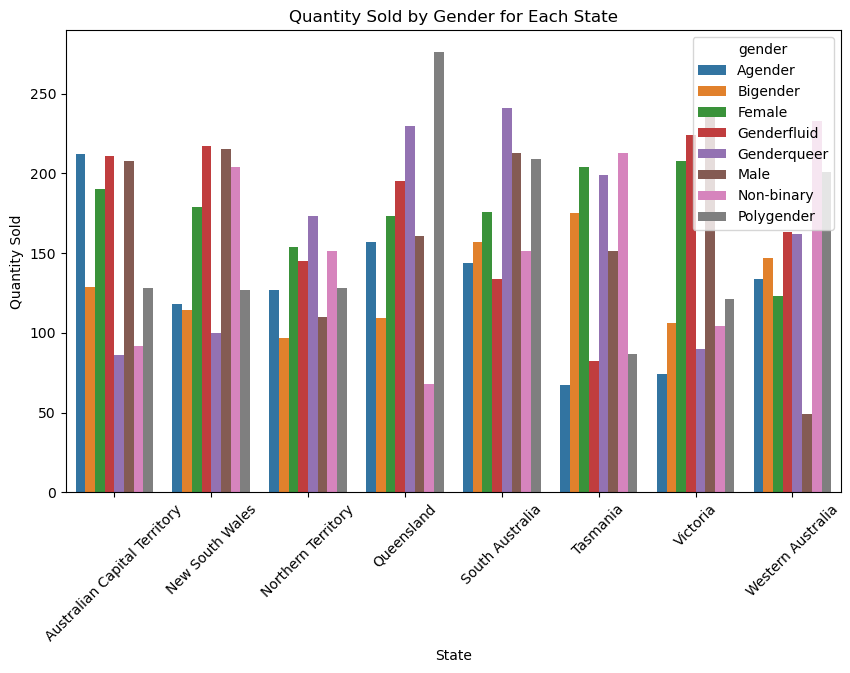

In [33]:
# Plot the quantity sold by gender for each state
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='state', y='total_quantity_sold', hue='gender', data=state_gender_sales, ax=ax)
ax.set_title('Quantity Sold by Gender for Each State')
ax.set_xlabel('State')
ax.set_ylabel('Quantity Sold')
plt.xticks(rotation=45)

Text(0, 0.5, 'Quantity Sold')

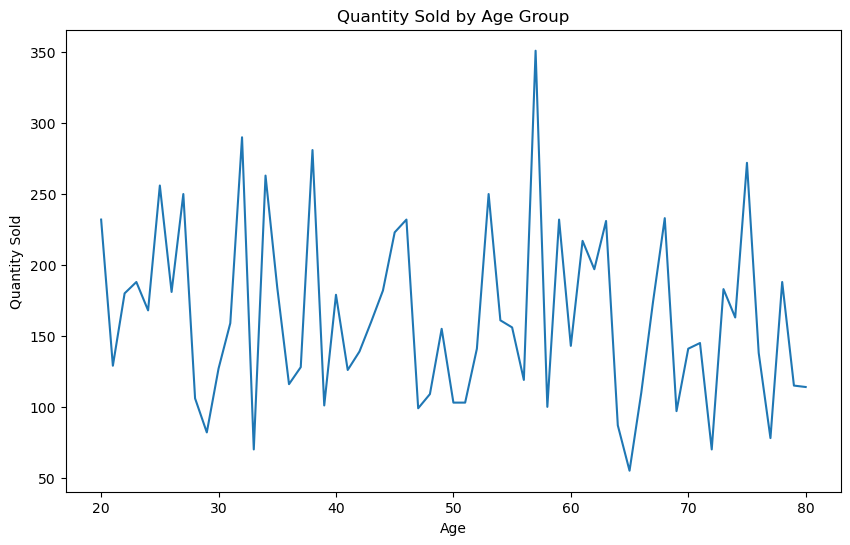

In [34]:
# Group the data by age to get the total quantity sold for each age group
age_sales = sales_demographic.groupby('age').sum()['total_quantity_sold'].reset_index()

# Plot the quantity sold for each age group
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x='age', y='total_quantity_sold', data=age_sales, ax=ax)
ax.set_title('Quantity Sold by Age Group')
ax.set_xlabel('Age')
ax.set_ylabel('Quantity Sold')

In [35]:
sales_demographic.groupby('age')['total_quantity_sold'].sum()

age
20    232
21    129
22    180
23    188
24    168
     ... 
76    138
77     78
78    188
79    115
80    114
Name: total_quantity_sold, Length: 61, dtype: int64

In [36]:
sales_demographic.describe()

,age,total_quantity_sold
count,4861.000000,4861.000000
mean,48.768155,2.049373
std,17.559374,0.891910
min,20.000000,1.000000
25%,34.000000,1.000000
50%,48.000000,2.000000
75%,63.000000,3.000000
max,80.000000,8.000000


# Yes

[Text(0.5, 1.0, 'Quantity Sold by Age Group')]

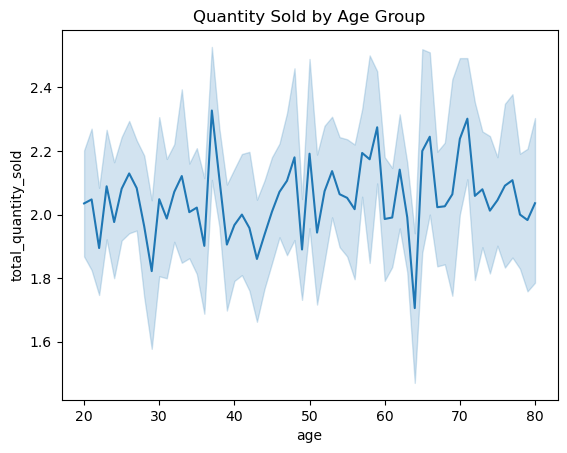

In [37]:
sns.lineplot(x='age', y='total_quantity_sold', data=sales_demographic).set(title='Quantity Sold by Age Group')

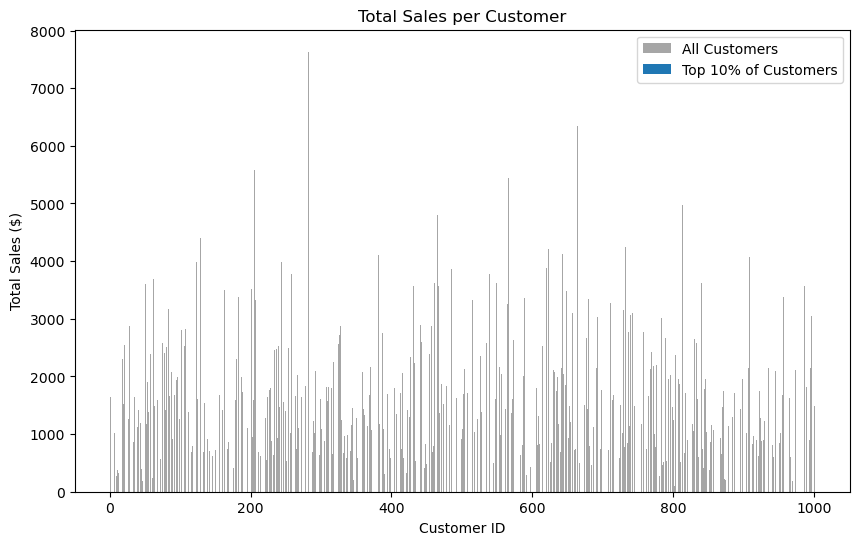

In [38]:
# Calculate the total sales per customer
customer_sales = sales_data.groupby('customer_id').sum()['total_price'].reset_index()

# Sort the customers by sales and calculate the cumulative sum
customer_sales = customer_sales.sort_values('total_price', ascending=False)
customer_sales['cumulative_sum'] = customer_sales['total_price'].cumsum()

# Calculate the total sales and number of customers
total_sales = customer_sales['total_price'].sum()
total_customers = customer_sales.shape[0]

# Calculate the cut-off for the top 10% of customers
top_10_percent_cutoff = total_sales * 0.1

# Find the index of the first customer whose cumulative sum is above the cut-off
top_10_percent_index = customer_sales['cumulative_sum'][customer_sales['cumulative_sum'] >= top_10_percent_cutoff].idxmin()

# Subset the top 10% of customers
top_10_percent_customers = customer_sales.loc[0:top_10_percent_index, :]

# Plot the total sales per customer and highlight the top 10%
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x=customer_sales['customer_id'], height=customer_sales['total_price'], color='gray', alpha=0.7)
ax.bar(x=top_10_percent_customers['customer_id'], height=top_10_percent_customers['total_price'], color='blue')
ax.set_title('Total Sales per Customer')
ax.set_xlabel('Customer ID')
ax.set_ylabel('Total Sales ($)')
ax.legend(['All Customers', 'Top 10% of Customers'])
plt.show()

In [39]:
top_customers = customer_sales.groupby('customer_id').sum()['total_price'].sort_values(ascending=False)
print(top_customers.head(10))

customer_id
282    7632
571    6640
664    6341
683    5657
206    5581
566    5435
348    5119
813    4969
465    4807
727    4428
Name: total_price, dtype: int64


In [40]:
total_sales = customer_sales['total_price'].sum()
top_customers = customer_sales.groupby('customer_id').sum()['total_price'].sort_values(ascending=False).reset_index()
top_customers['percent_total_sales'] = top_customers['total_price'] / total_sales * 100
print("Top 10 customers by total price:")
print(top_customers.head(10))

Top 10 customers by total price:
   customer_id  total_price  percent_total_sales
0          282         7632             0.739678
1          571         6640             0.643536
2          664         6341             0.614557
3          683         5657             0.548265
4          206         5581             0.540899
5          566         5435             0.526749
6          348         5119             0.496123
7          813         4969             0.481586
8          465         4807             0.465885
9          727         4428             0.429153


In [41]:
# Load the data
sales_data = pd.read_csv('../Queries/total_quantity_sold_gender_age_city_state_country.csv')

# Group the data by product name and sum the total quantity sold for each product
product_sales = sales_data.groupby('product_name')['total_quantity_sold'].sum().reset_index()

# Sort the data in descending order by total sales
sorted_sales = product_sales.sort_values('total_quantity_sold', ascending=False)

# Print the product with the highest sales
print("Product with the highest sales:")
print(sorted_sales.iloc[0])

# Print the product with the lowest sales
print("\nProduct with the lowest sales:")
print(sorted_sales.iloc[-1])

Product with the highest sales:
product_name           Denim
total_quantity_sold      527
Name: 11, dtype: object

Product with the lowest sales:
product_name           Mandarin Collar
total_quantity_sold                236
Name: 20, dtype: object


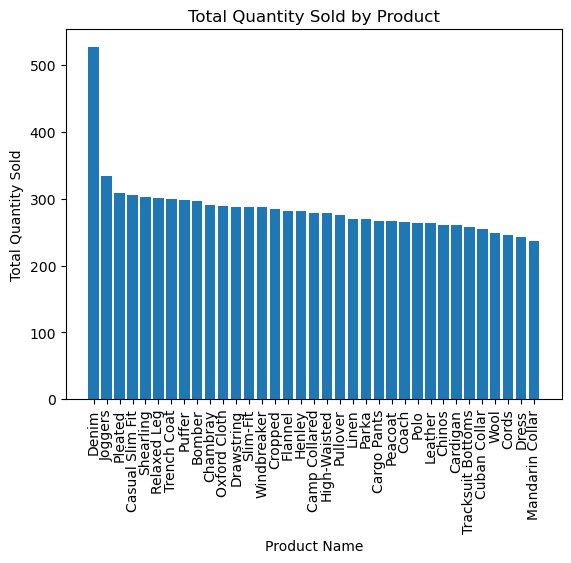

In [42]:
# Create a bar chart
plt.bar(sorted_sales['product_name'], sorted_sales['total_quantity_sold'])

# Set the chart title and axis labels
plt.title('Total Quantity Sold by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

In [43]:
total_quantity_sold_df = pd.read_csv('../Queries/total_quantity_sold.csv')

# Merge the sales and products dataframes on the product id
sales_prod_merged_df = pd.merge(sales, products[['product_id', 'product_type', 'size', 'price']], left_on='product_id', right_on='product_id')

# Calculate the revenue for each product type and size combination
sales_prod_merged_df['total_revenue'] = sales_prod_merged_df['quantity'] * sales_prod_merged_df['price']

grouped_df = sales_prod_merged_df.groupby(['product_type', 'size'])['total_revenue'].sum().reset_index()

# Sort the dataframe in descending order by total revenue
sorted_df = grouped_df.sort_values(by='total_revenue', ascending=False)

# Display the top 10 most profitable product types and sizes
# print(sorted_df.head(10))

# Print the top 10 most profitable product types and sizes
print("Top 10 most profitable product types and sizes:")
print(sorted_df.head(10))

Top 10 most profitable product types and sizes:
   product_type size  total_revenue
7         Shirt    S          74731
4        Jacket   XS          74458
1        Jacket    M          73251
0        Jacket    L          72548
2        Jacket    S          72339
6         Shirt    M          71589
13     Trousers   XL          70475
11     Trousers    M          70022
9         Shirt   XS          70001
10     Trousers    L          69863


# Yes

In [44]:
import pandas as pd
from tabulate import tabulate

total_quantity_sold_df = pd.read_csv('../Queries/total_quantity_sold.csv')

# Merge the sales and products dataframes on the product id
sales_prod_merged_df = pd.merge(sales, products[['product_id', 'product_type', 'size', 'price']], left_on='product_id', right_on='product_id')

# Calculate the revenue for each product type and size combination
sales_prod_merged_df['total_revenue'] = sales_prod_merged_df['quantity'] * sales_prod_merged_df['price']

grouped_df = sales_prod_merged_df.groupby(['product_type', 'size'])['total_revenue'].sum().reset_index()

# Sort the dataframe in descending order by total revenue
sorted_df = grouped_df.sort_values(by='total_revenue', ascending=False)

# Display the top 10 most profitable product types and sizes
print("Top 10 most profitable product types and sizes:")
print(tabulate(sorted_df.head(10), headers='keys', tablefmt='psql'))


Top 10 most profitable product types and sizes:
+----+----------------+--------+-----------------+
|    | product_type   | size   |   total_revenue |
|----+----------------+--------+-----------------|
|  7 | Shirt          | S      |           74731 |
|  4 | Jacket         | XS     |           74458 |
|  1 | Jacket         | M      |           73251 |
|  0 | Jacket         | L      |           72548 |
|  2 | Jacket         | S      |           72339 |
|  6 | Shirt          | M      |           71589 |
| 13 | Trousers       | XL     |           70475 |
| 11 | Trousers       | M      |           70022 |
|  9 | Shirt          | XS     |           70001 |
| 10 | Trousers       | L      |           69863 |
+----+----------------+--------+-----------------+


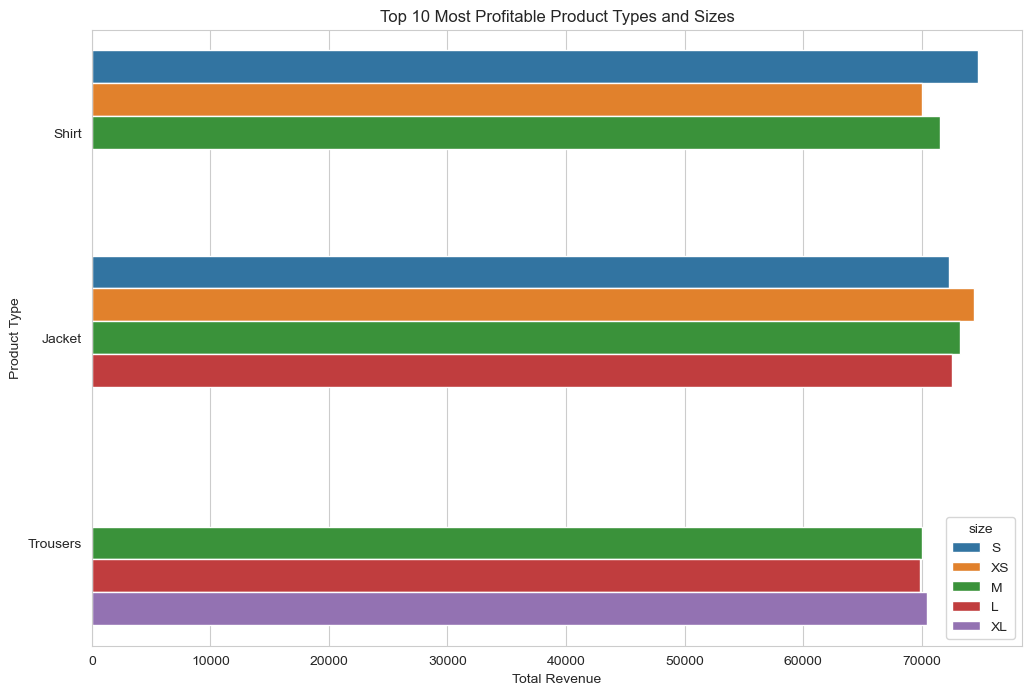

In [45]:
import seaborn as sns

# Plot the top 10 most profitable product types and sizes
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='total_revenue', y='product_type', hue='size', data=sorted_df.head(10))
plt.title('Top 10 Most Profitable Product Types and Sizes')
plt.xlabel('Total Revenue')
plt.ylabel('Product Type')
plt.show()

# Key Performance Indicators (KPIs)

1. Average Order Value (AOV): This metric measures the average dollar amount spent per order. Tracking AOV can help identify ways to increase revenue and profitability.

SQL code: 

SELECT AVG(total_price) as AOV
FROM sales

In [46]:
print("The Average Order Value is $206.36")

The Average Order Value is $206.36


In [47]:
# Load the data from the CSV file
sales_data = pd.read_csv('../Queries/sales_by_product.csv')

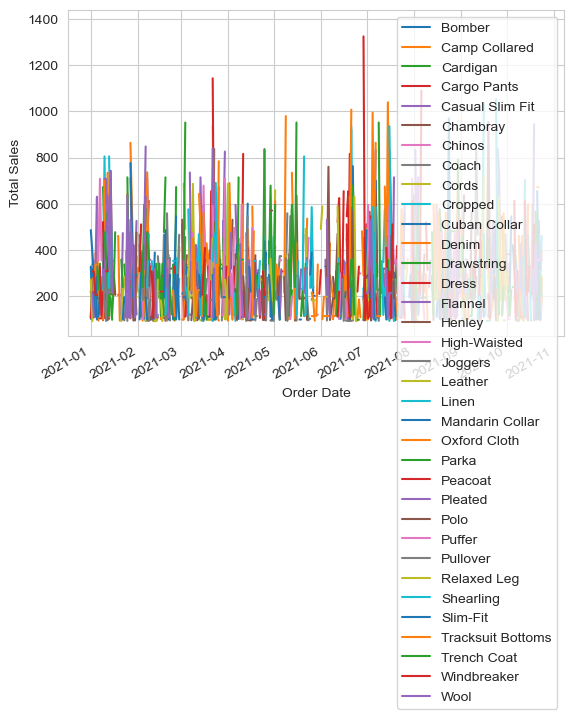

In [54]:
# Convert the order_date column to a datetime object
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])

# Group the data by order_date and product_name and sum the total_price
sales_data_grouped = sales_data.groupby(['order_date', 'product_name']).sum()['total_price']

# Pivot the data to create a separate series for each product
sales_data_pivoted = sales_data_grouped.unstack()

# Create a line chart with different colors for each product
fig, ax = plt.subplots()
sales_data_pivoted.plot(ax=ax)

# Set the axis labels and legend
ax.set_xlabel('Order Date')
ax.set_ylabel('Total Sales')
ax.legend()

# Show the plot
plt.show()

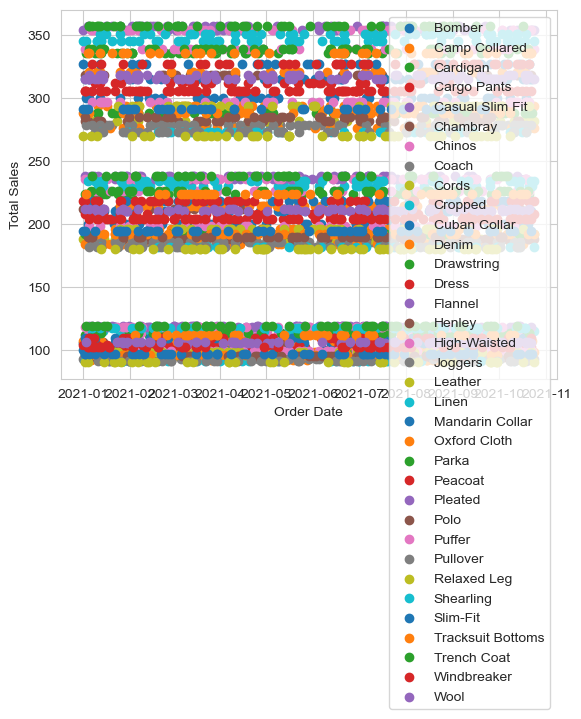

In [52]:
# Create a scatter plot with different colors for each product
fig, ax = plt.subplots()
for product, data in sales_data.groupby('product_name'):
    ax.scatter(data['order_date'], data['total_price'], label=product)
    
# Set the axis labels and legend
ax.set_xlabel('Order Date')
ax.set_ylabel('Total Sales')
ax.legend()

# Show the plot
plt.show()

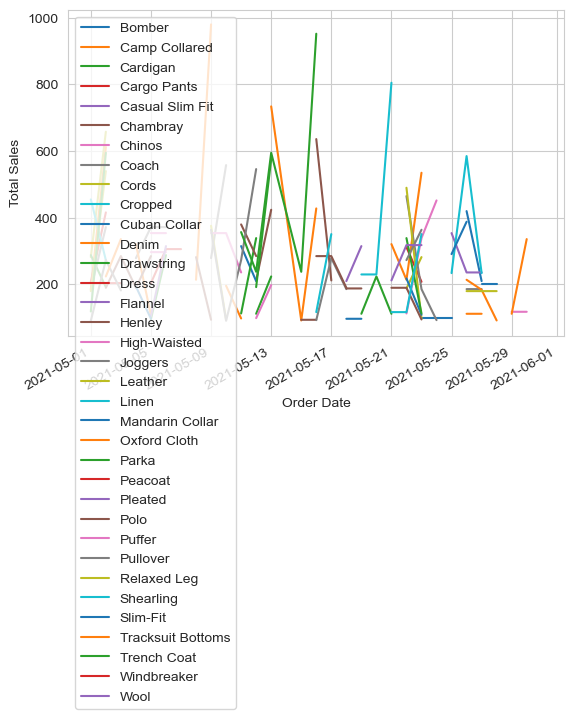

In [56]:
# Convert the order_date column to a datetime object
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])

# Filter the data to include only the rows for May 2023
may_2021_data = sales_data[(sales_data['order_date'].dt.month == 5) & (sales_data['order_date'].dt.year == 2021)]

# Group the data by order_date and product_name and sum the total_price
may_2021_data_grouped = may_2021_data.groupby(['order_date', 'product_name']).sum()['total_price']

# Pivot the data to create a separate series for each product
may_2021_data_pivoted = may_2021_data_grouped.unstack()

# Create a line chart with different colors for each product
fig, ax = plt.subplots()
may_2021_data_pivoted.plot(ax=ax)

# Set the axis labels and legend
ax.set_xlabel('Order Date')
ax.set_ylabel('Total Sales')
ax.legend()

# Show the plot
plt.show()

In [57]:
sales_data.head()

,sales_id,total_price,quantity,price_per_unit,order_date,product_name
0,0,212,2,106,2021-08-30,Chambray
1,1,118,1,118,2021-08-30,Puffer
2,2,288,3,96,2021-08-30,Oxford Cloth
3,3,212,2,106,2021-08-30,Wool
4,4,339,3,113,2021-08-30,Parka


In [58]:
# Group the data by product_name and sum the quantity for each product
product_sales = sales_data.groupby('product_name')['quantity'].sum()

# Sort the product sales in descending order and select the top ten rows
top_products = product_sales.sort_values(ascending=False).head(10)

# Print the top ten products sold
print(top_products)

product_name
Denim              527
Joggers            334
Pleated            308
Casual Slim Fit    306
Shearling          302
Relaxed Leg        301
Trench Coat        299
Puffer             298
Bomber             297
Chambray           290
Name: quantity, dtype: int64


In [59]:
sales_data.describe()

,sales_id,total_price,quantity,price_per_unit
count,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,206.360000,1.99240,103.501600
std,1443.520003,86.357457,0.80751,9.195004
min,0.000000,90.000000,1.00000,90.000000
25%,1249.750000,112.000000,1.00000,95.000000
50%,2499.500000,204.000000,2.00000,102.000000
75%,3749.250000,285.000000,3.00000,112.000000
max,4999.000000,357.000000,3.00000,119.000000
